1) En el informe, se debe reflejar carga de datos.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [67]:
#Cargar Datos

nombre_archivo = 'Base de datos Limpia.xlsx'
nombre_hoja = 'Limpia_social_media_vs_producti'
datos = pd.read_excel(nombre_archivo, sheet_name=nombre_hoja)
print(datos.info)
datos.isnull().sum()

<bound method DataFrame.info of        Edad  Genero Tipo_Trabajo  Hora_Diaria_En_Redes Red_Social_Favorita  \
0        56    Male   Unemployed                  4.18            Facebook   
1        46    Male       Health                  3.25             Twitter   
2        32    Male      Finance                  3.11             Twitter   
3        60  Female   Unemployed                  3.11            Facebook   
4        25    Male           IT                  3.11            Telegram   
...     ...     ...          ...                   ...                 ...   
29995    34  Female       Health                  1.88            Facebook   
29996    39    Male       Health                  4.44           Instagram   
29997    42    Male    Education                 17.72              TikTok   
29998    20  Female    Education                  3.80           Instagram   
29999    44    Male   Unemployed                  3.11             Twitter   

       Notificaciones_Diarias  

Edad                                     0
Genero                                   0
Tipo_Trabajo                             0
Hora_Diaria_En_Redes                     0
Red_Social_Favorita                      0
Notificaciones_Diarias                   0
Horas_Diarias_Trabajadas                 0
Nivel_Estres                             0
Horas_De_Sueño                           0
Uso_Antes_De_Dormir                      0
Breaks_En_El_Trabajo                     0
Uso_De_Apps_De_Enfoque                   0
Estado_De_BienestarDigital_Activo        0
Tazas_De_Cafe_Por_Dia                    0
Dias_Del_Mes_Con_Burnout                 0
Horas_Semanales_Fuera_De_Linea           0
Puntuacion_De_Satisfaccion_Laboral       0
Puntuacion_Productividad _Real           0
Puntuacion_productividad_autoevaluada    0
dtype: int64

In [68]:
datos.describe()

Edad  Hora_Diaria_En_Redes  Notificaciones_Diarias  \
count  30000.000000          30000.000000            30000.000000   
mean      41.486867              3.113101               59.958767   
std       13.835221              1.976883                7.723772   
min       18.000000              0.000000               30.000000   
25%       30.000000              1.800000               55.000000   
50%       41.000000              3.110000               60.000000   
75%       53.000000              4.220000               65.000000   
max       65.000000             17.970000               90.000000   

       Horas_Diarias_Trabajadas  Nivel_Estres  Horas_De_Sueño  \
count              30000.000000   30000.00000    30000.000000   
mean                   7.009646       5.54490        6.500232   
std                    1.969248       2.77642        1.399193   
min                    1.580000       1.00000        3.000000   
25%                    5.670000       3.00000        5.600000   
50%                    6.990000       6.00000        6.500000   
75%                    8.350000       8.00000        7.400000   
max                   12.000000      10.00000       10.000000   

       Uso_Antes_De_Dormir  Breaks_En_El_Trabajo  Tazas_De_Cafe_Por_Dia  \
count         30000.000000          30000.000000           30000.000000   
mean              1.025151              4.992200               1.999300   
std               0.628827              3.173737               1.410047   
min               0.000000              0.000000               0.000000   
25%               0.570000              2.000000               1.000000   
50%               1.020000              5.000000               2.000000   
75%               1.440000              8.000000               3.000000   
max               3.000000             10.000000              10.000000   

       Dias_Del_Mes_Con_Burnout  Horas_Semanales_Fuera_De_Linea  \
count              30000.000000                     30000.00000   
mean                  15.557067                        10.36064   
std                    9.252956                         7.28041   
min                    0.000000                         0.00000   
25%                    8.000000                         4.54000   
50%                   16.000000                        10.01000   
75%                   24.000000                        15.30000   
max                   31.000000                        40.96000   

       Puntuacion_De_Satisfaccion_Laboral  Puntuacion_Productividad _Real  \
count                        30000.000000                    30000.000000   
mean                             4.964450                        4.960543   
std                              2.022377                        1.896751   
min                              0.000000                        0.300000   
25%                              3.530000                        3.370000   
50%                              4.960000                        4.960000   
75%                              6.410000                        6.550000   
max                             10.000000                       11.036309   

       Puntuacion_productividad_autoevaluada  
count                           30000.000000  
mean                                5.516214  
std                                 2.017307  
min                                 0.850000  
25%                                 3.780000  
50%                                 5.530000  
75%                                 7.260000  
max                                11.586309

4) Realización de escalamiento (normalización) de datos si es necesario.

In [69]:

X = datos[['Hora_Diaria_En_Redes', 'Horas_Diarias_Trabajadas']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

5) Obtención de valor óptimo de K, aplicación de algoritmo K-means.

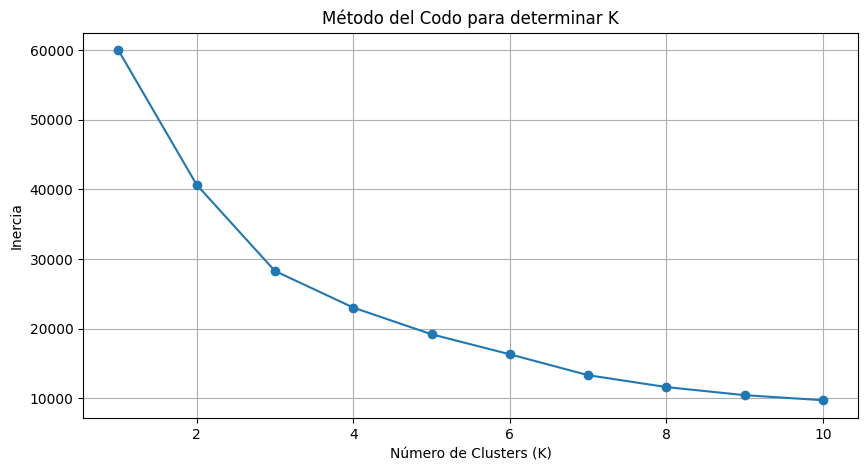

In [70]:
# interación de inercias
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

6) entrenamiento del modelo, obtención de las coordenadas de los centroides.

In [71]:
# Teniendo en cuenta el codo como 5
kmeans = KMeans(n_clusters=3, random_state=42)
datos['Cluster'] = kmeans.fit_predict(X_scaled)
datos.head()

Edad  Genero Tipo_Trabajo  Hora_Diaria_En_Redes Red_Social_Favorita  \
0    56    Male   Unemployed                  4.18            Facebook   
1    46    Male       Health                  3.25             Twitter   
2    32    Male      Finance                  3.11             Twitter   
3    60  Female   Unemployed                  3.11            Facebook   
4    25    Male           IT                  3.11            Telegram   

   Notificaciones_Diarias  Horas_Diarias_Trabajadas  Nivel_Estres  \
0                      61                      6.75             4   
1                      59                      9.17             7   
2                      57                      7.91             4   
3                      59                      6.36             6   
4                      66                      6.21             7   

   Horas_De_Sueño  Uso_Antes_De_Dormir  Breaks_En_El_Trabajo  \
0            5.12                 0.42                     8   
1            5.10                 0.67                     7   
2            8.58                 0.62                     0   
3            6.05                 1.20                     1   
4            5.41                 1.88                     1   

   Uso_De_Apps_De_Enfoque  Estado_De_BienestarDigital_Activo  \
0                   False                              False   
1                    True                               True   
2                    True                              False   
3                   False                              False   
4                   False                               True   

   Tazas_De_Cafe_Por_Dia  Dias_Del_Mes_Con_Burnout  \
0                      4                        11   
1                      2                        25   
2                      3                        17   
3                      0                         4   
4                      1                        30   

   Horas_Semanales_Fuera_De_Linea  Puntuacion_De_Satisfaccion_Laboral  \
0                           21.93                                6.34   
1                            0.00                                3.41   
2                           10.32                                2.47   
3                           23.88                                1.73   
4                           10.65                                9.69   

   Puntuacion_Productividad _Real  Puntuacion_productividad_autoevaluada  \
0                            7.29                                   8.04   
1                            5.17                                   5.06   
2                            3.47                                   3.86   
3                            1.77                                   2.92   
4                            8.32                                   8.87   

   Cluster  
0        2  
1        0  
2        0  
3        1  
4        1

7) realización de predicción con la muestra obtenida.

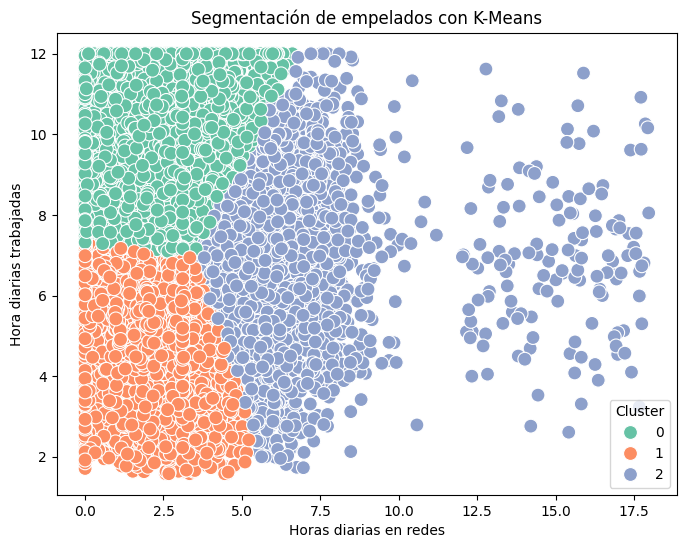

In [72]:
# Visualizacion de clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Hora_Diaria_En_Redes',
    y='Horas_Diarias_Trabajadas',
    hue='Cluster',
    data=datos,
    palette='Set2',
    s=100
)

plt.title('Segmentación de empelados con K-Means')
plt.xlabel('Horas diarias en redes')
plt.ylabel('Hora diarias trabajadas')
plt.legend(title='Cluster')

In [73]:
cluster_summary = datos.groupby('Cluster')[['Hora_Diaria_En_Redes', 'Horas_Diarias_Trabajadas']].mean()
print("Resumen por cluster:")
print(cluster_summary)

Resumen por cluster:
         Hora_Diaria_En_Redes  Horas_Diarias_Trabajadas
Cluster                                                
0                    2.452360                  8.816790
1                    2.206155                  5.410039
2                    5.530576                  6.795877


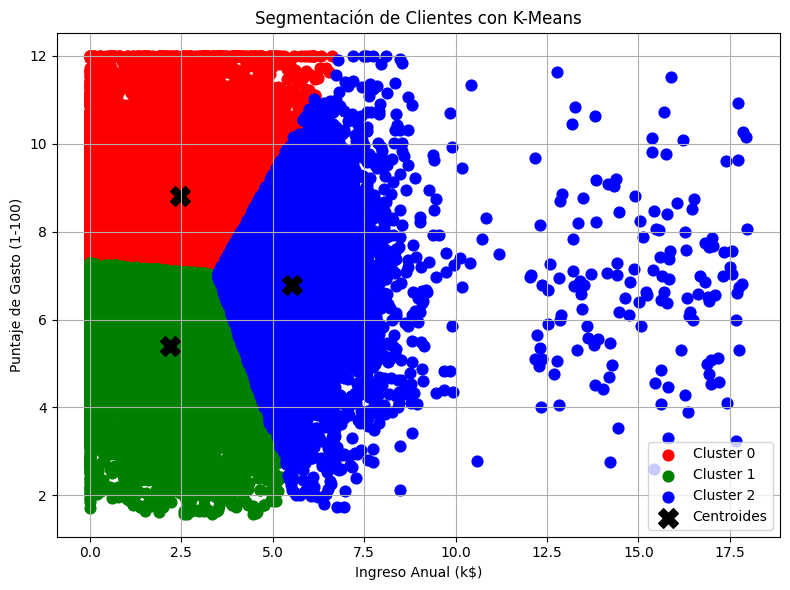

In [74]:
# Clusters con sus centroides
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_data = datos[datos['Cluster'] == i]
    plt.scatter(cluster_data['Hora_Diaria_En_Redes'],
                cluster_data['Horas_Diarias_Trabajadas'],
                s=60, c=colors[i], label=f'Cluster {i}')
centroids = kmeans.cluster_centers_
centroides_original = scaler.inverse_transform(centroids)
plt.scatter(centroides_original[:, 0], centroides_original[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title('Segmentación de Clientes con K-Means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [75]:
datos

Edad  Genero Tipo_Trabajo  Hora_Diaria_En_Redes Red_Social_Favorita  \
0        56    Male   Unemployed                  4.18            Facebook   
1        46    Male       Health                  3.25             Twitter   
2        32    Male      Finance                  3.11             Twitter   
3        60  Female   Unemployed                  3.11            Facebook   
4        25    Male           IT                  3.11            Telegram   
...     ...     ...          ...                   ...                 ...   
29995    34  Female       Health                  1.88            Facebook   
29996    39    Male       Health                  4.44           Instagram   
29997    42    Male    Education                 17.72              TikTok   
29998    20  Female    Education                  3.80           Instagram   
29999    44    Male   Unemployed                  3.11             Twitter   

       Notificaciones_Diarias  Horas_Diarias_Trabajadas  Nivel_Estres  \
0                          61                      6.75             4   
1                          59                      9.17             7   
2                          57                      7.91             4   
3                          59                      6.36             6   
4                          66                      6.21             7   
...                       ...                       ...           ...   
29995                      59                     10.23             8   
29996                      46                      4.69             8   
29997                      64                     10.92             5   
29998                      56                      6.94             8   
29999                      70                      8.07             3   

       Horas_De_Sueño  Uso_Antes_De_Dormir  Breaks_En_El_Trabajo  \
0                5.12                 0.42                     8   
1                5.10                 0.67                     7   
2                8.58                 0.62                     0   
3                6.05                 1.20                     1   
4                5.41                 1.88                     1   
...               ...                  ...                   ...   
29995            5.48                 1.41                     9   
29996            3.05                 0.15                     3   
29997            5.49                 1.22                    10   
29998            6.82                 0.23                     1   
29999            6.77                 0.99                     5   

       Uso_De_Apps_De_Enfoque  Estado_De_BienestarDigital_Activo  \
0                       False                              False   
1                        True                               True   
2                        True                              False   
3                       False                              False   
4                       False                               True   
...                       ...                                ...   
29995                   False                              False   
29996                   False                              False   
29997                   False                              False   
29998                   False                              False   
29999                   False                               True   

       Tazas_De_Cafe_Por_Dia  Dias_Del_Mes_Con_Burnout  \
0                          4                        11   
1                          2                        25   
2                          3                        17   
3                          0                         4   
4                          1                        30   
...                      ...                       ...   
29995                      4                         5   
29996                      1                        29   
29997                      1         

In [76]:
datos.to_excel("BD_CLuster.xlsx", index=False)

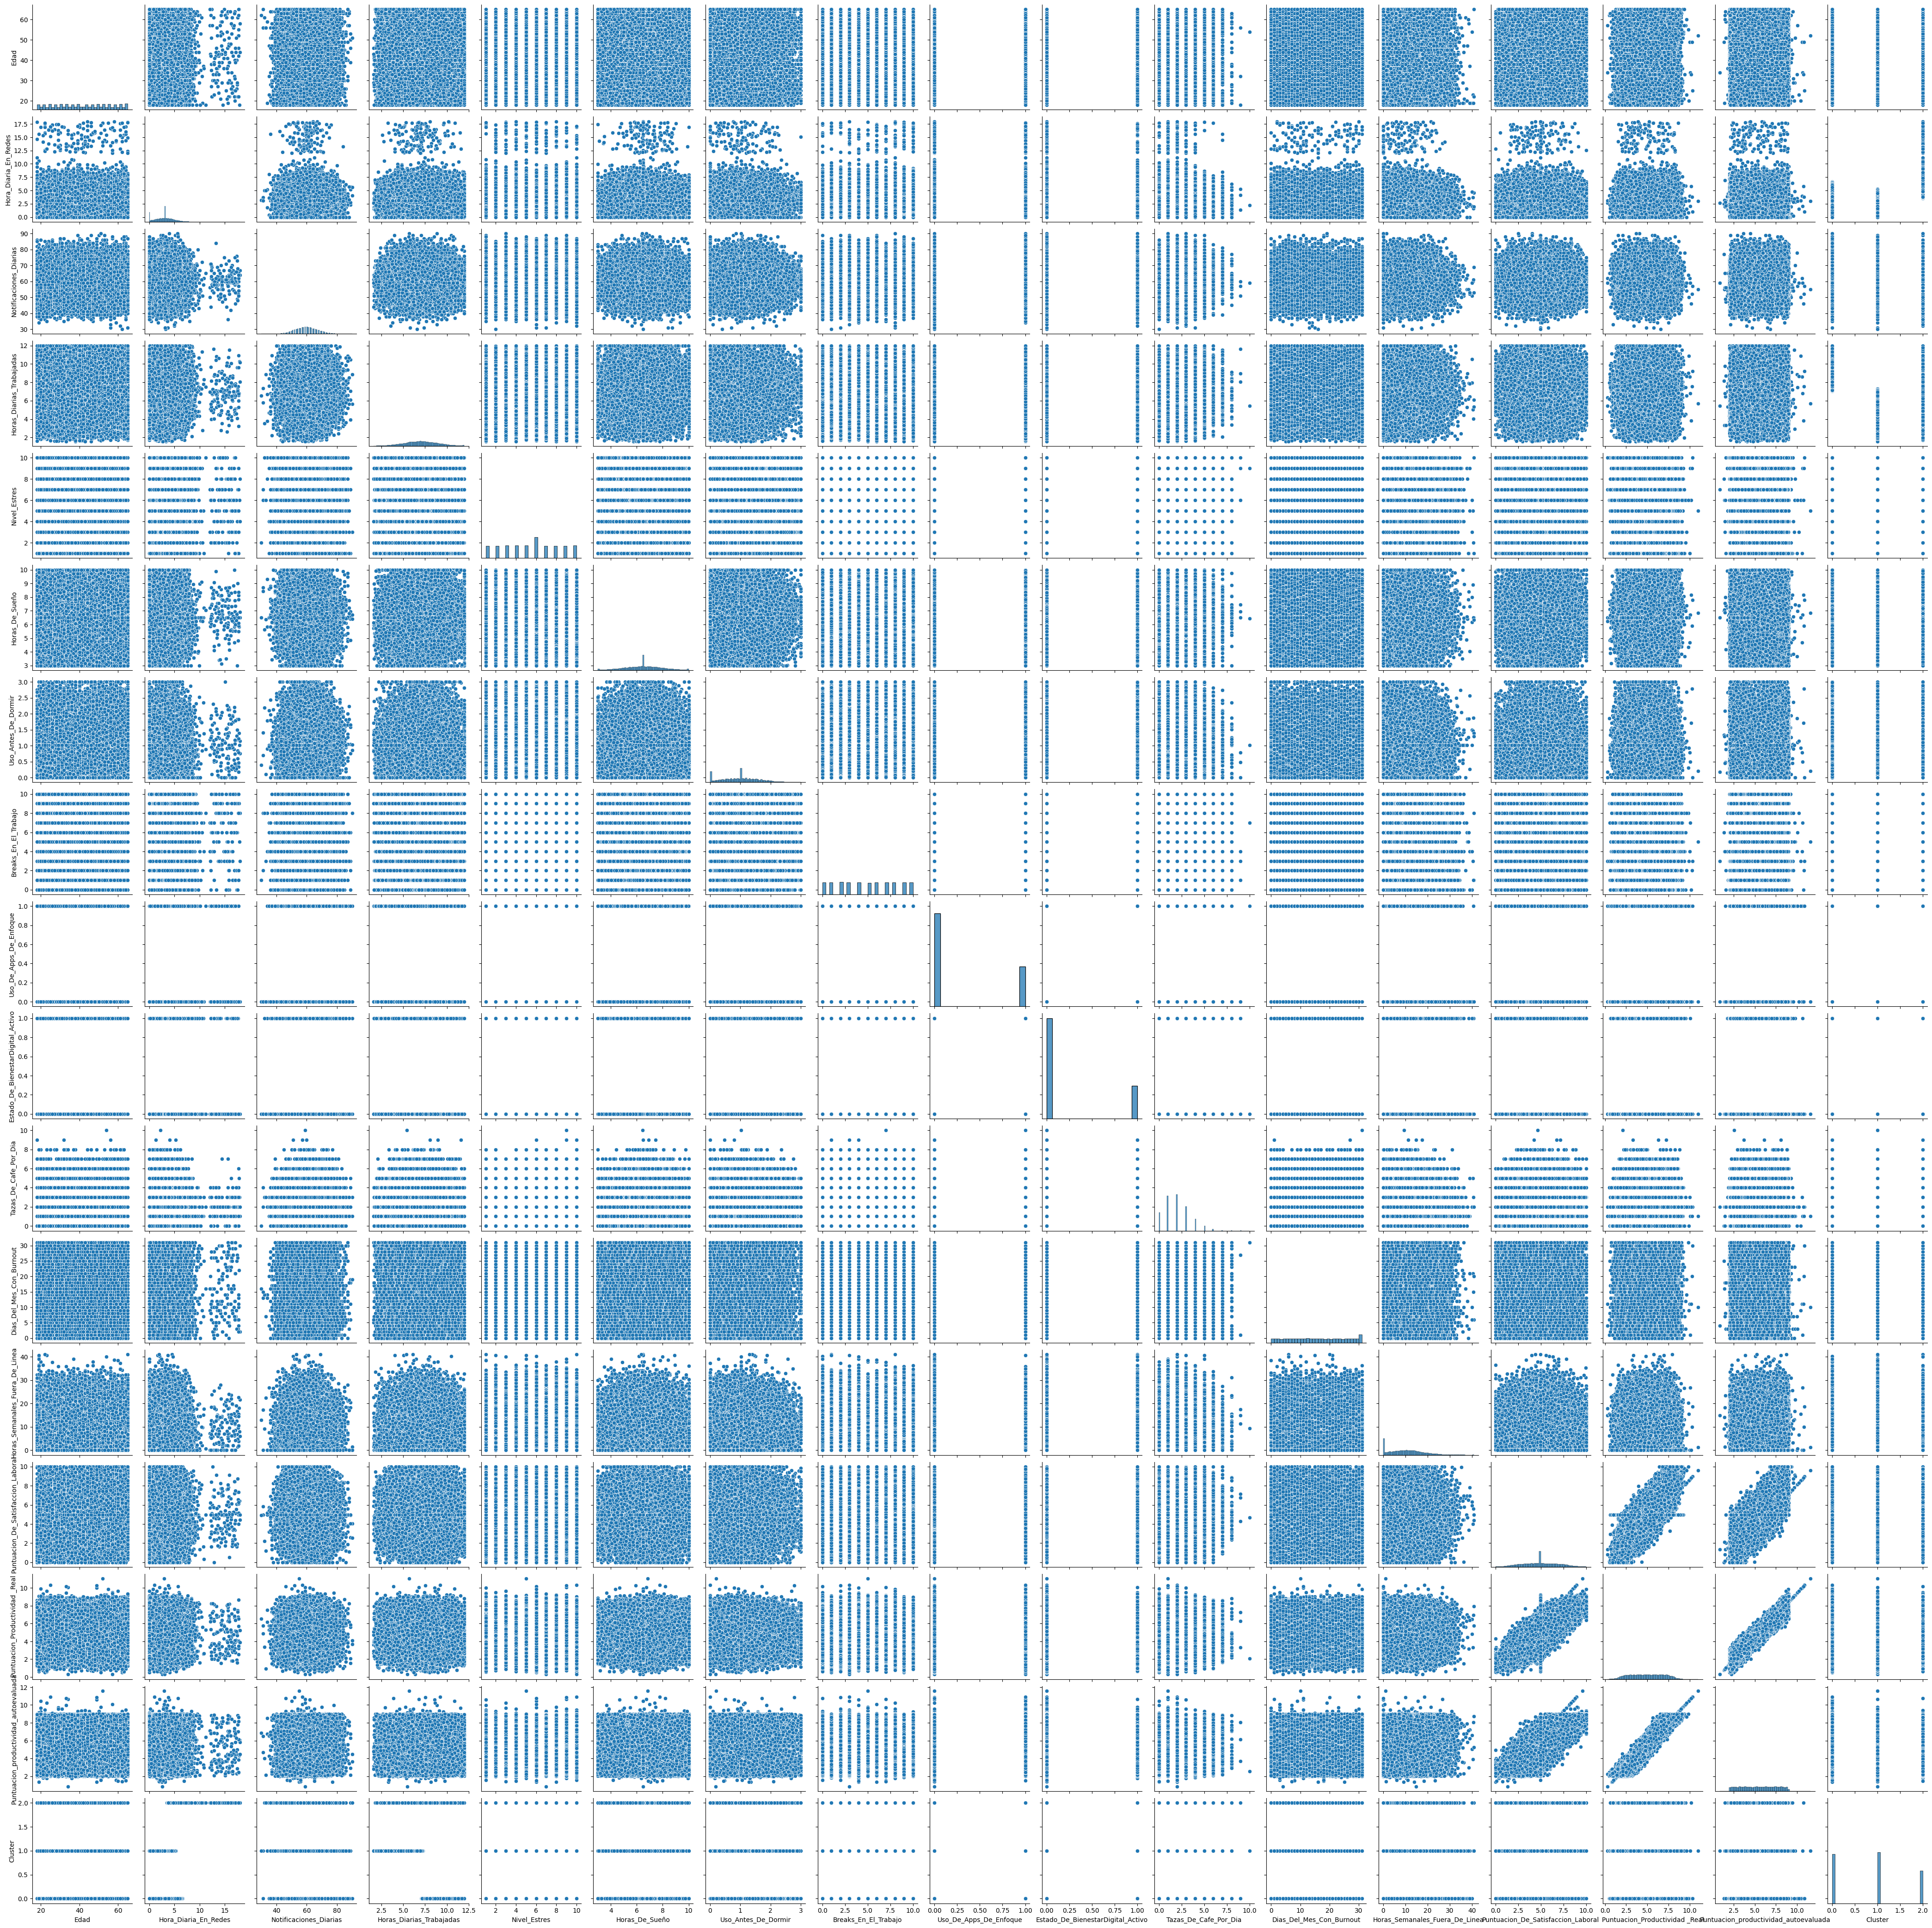

In [77]:
sns.pairplot(datos)
plt.show()

In [78]:
correlacion = datos.corr(numeric_only=True)

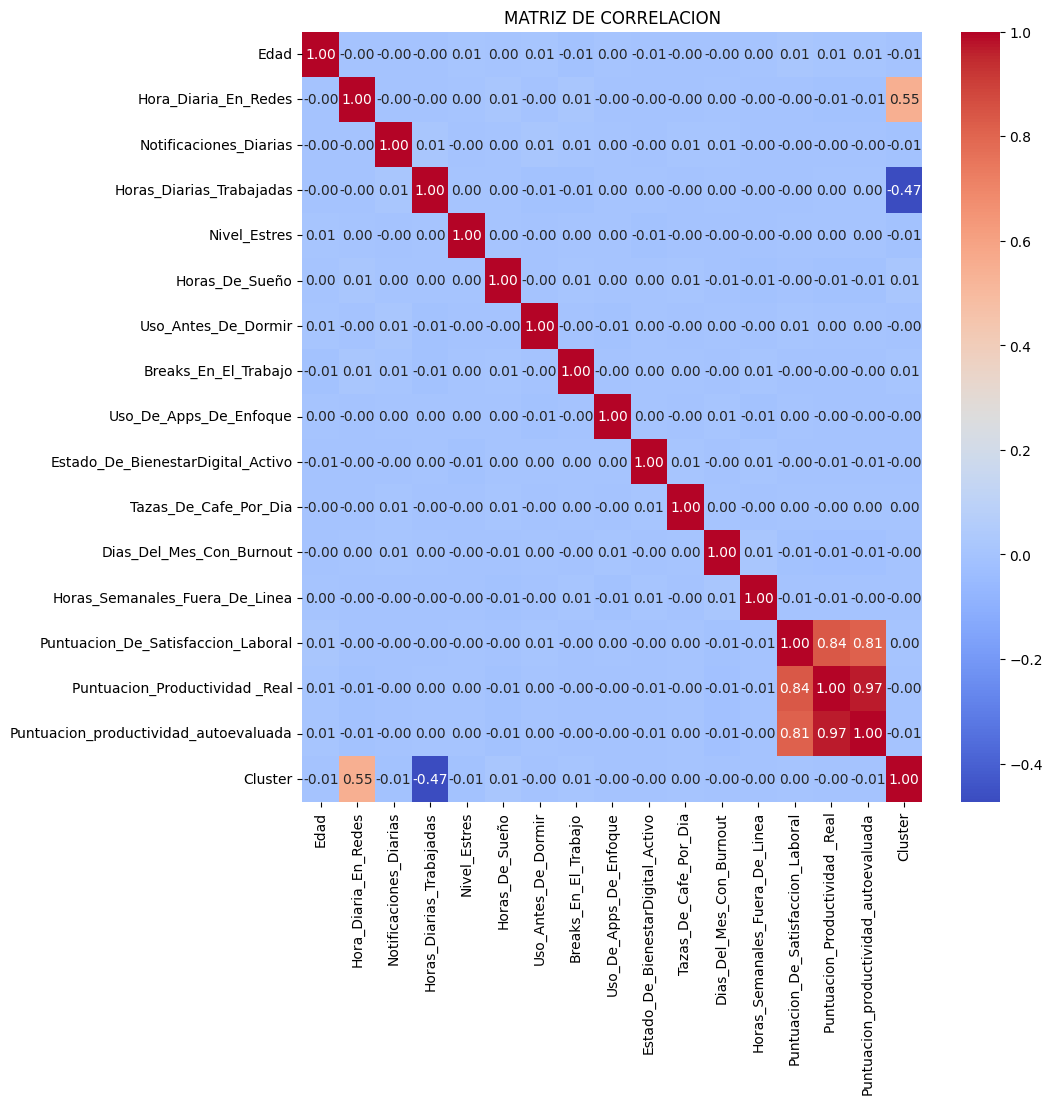

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(correlacion, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("MATRIZ DE CORRELACION")
plt.show()

In [ ]:
sns.pairplot(datos)
plt.show()